Here is a link to the full code, with indenting:
    http://www.trondkristiansen.com/wp-content/uploads/downloads/2013/05/extractCMIP5forLME_v3.py

In [1]:
%matplotlib inline
import numpy as np
from mpl_toolkits.basemap import Basemap, shiftgrid
import matplotlib.pyplot as plt
import ogr
import matplotlib.path as mpath

In [63]:
import matplotlib.patches as patches

In [17]:
import matplotlib

In [2]:
from matplotlib.patches import Polygon

In [3]:
help(Polygon)

Help on class Polygon in module matplotlib.patches:

class Polygon(Patch)
 |  A general polygon patch.
 |  
 |  Method resolution order:
 |      Polygon
 |      Patch
 |      matplotlib.artist.Artist
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, xy, closed=True, **kwargs)
 |      *xy* is a numpy array with shape Nx2.
 |      
 |      If *closed* is *True*, the polygon will be closed so the
 |      starting and ending points are the same.
 |      
 |      Valid kwargs are:
 |        agg_filter: unknown
 |        alpha: float or None 
 |        animated: [True | False] 
 |        antialiased or aa: [True | False]  or None for default 
 |        capstyle: ['butt' | 'round' | 'projecting'] 
 |        clip_box: a :class:`matplotlib.transforms.Bbox` instance 
 |        clip_on: [True | False] 
 |        clip_path: [ (:class:`~matplotlib.path.Path`, :class:`~matplotlib.transforms.Transform`) | :class:`~matplotlib.patches.Patch` | None ] 
 |        color: ma

In [4]:
help(plt.mlab.inside_poly)

Help on function inside_poly in module matplotlib.mlab:

inside_poly(points, verts)
    *points* is a sequence of *x*, *y* points.
    *verts* is a sequence of *x*, *y* vertices of a polygon.
    
    Return value is a sequence of indices into points for the points
    that are inside the polygon.



So basically the above says if the points you put in are in the polygon defined by the vertices

Let's try reading in the first LME and seing if we can make a mask from it


In [5]:
sfile = 'LME66/LMEs66.shp'

In [6]:
ds = ogr.Open(sfile)
lyr = ds.GetLayer(0)


index = 0 # first LME
ft = lyr.GetFeature(index)
print "LME ", ft.items()['LME_NUMBER'], '  ',  ft.items()['LME_NAME']

geom = ft.GetGeometryRef()
                
"""Create lists to store values for polygons"""
codes = []; all_x = []; all_y = []; all_XY= []

# loop over all the things in the feature:
for i in range(geom.GetGeometryCount()):
    
    r = geom.GetGeometryRef(i)
    x = [r.GetX(j) for j in range(r.GetPointCount())]
    y = [r.GetY(j) for j in range(r.GetPointCount())]

    # this is some sort of polygon thing:
    codes += [mpath.Path.MOVETO] + (len(x)-1)*[mpath.Path.LINETO]

    all_x += x
    all_y += y

    

LME  23.0    Baltic Sea


/anaconda3/envs/py27/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/anaconda3/envs/py27/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/anaconda3/envs/py27/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda3/envs/py27/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


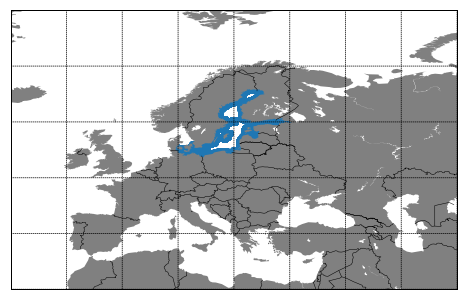

In [7]:
# plot the above x,y points in basemap

limN, limS, limW, limE = 80,30,-20,60

dlat = 10
dlon =10

ax = plt.figure(figsize=(8,10), facecolor = 'w')
mymap = Basemap(projection='cyl', llcrnrlon=limW, \
      urcrnrlon=limE, llcrnrlat=limS, urcrnrlat=limN, resolution='l')

mymap.drawcountries()

#mymap.drawcoastlines()
mymap.fillcontinents(color='grey',lake_color='white')
mymap.drawparallels(np.arange(-90.,120.,dlon))
mymap.drawmeridians(np.arange(0.,360.,dlat))
mymap.drawmapboundary(fill_color='white')

mx,my= mymap(all_x,all_y)

mymap.scatter(mx,my)


now that I have all of the points, how do I make a polygon?

Need the polygon package

from matplotlib.patches import Polygon

Here is an example:

https://stackoverflow.com/questions/12251189/how-to-draw-rectangles-on-a-basemap

/anaconda3/envs/py27/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()


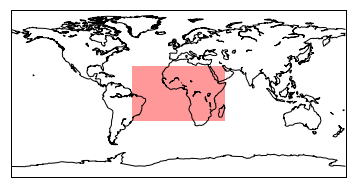

In [8]:
def draw_screen_poly( lats, lons, m):
    x, y = m( lons, lats )
    xy = zip(x,y)
    poly = Polygon( xy, facecolor='red', alpha=0.4 )
    plt.gca().add_patch(poly)

lats = [ -30, 30, 30, -30 ]
lons = [ -50, -50, 50, 50 ]

m = Basemap(projection='cyl',lon_0=0)
m.drawcoastlines()
m.drawmapboundary()
draw_screen_poly( lats, lons, m )


In [9]:
# what does zip do?
zip?
# makes the list of lons and lats into coordinate pairs

In [10]:
zip(lons, lats)

[(-50, -30), (-50, 30), (50, 30), (50, -30)]

Try this for the LME data

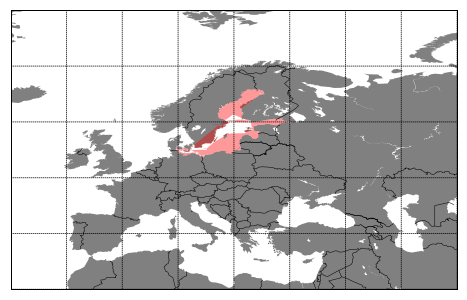

In [11]:
limN, limS, limW, limE = 80,30,-20,60

dlat = 10
dlon = 10


ax = plt.figure(figsize=(8,10), facecolor = 'w')
mymap = Basemap(projection='cyl', llcrnrlon=limW, \
      urcrnrlon=limE, llcrnrlat=limS, urcrnrlat=limN, resolution='l')
mymap.drawcountries()
#mymap.drawcoastlines()
mymap.fillcontinents(color='grey',lake_color='white')
mymap.drawparallels(np.arange(-90.,120.,dlon))
mymap.drawmeridians(np.arange(0.,360.,dlat))
mymap.drawmapboundary(fill_color='white')

draw_screen_poly(all_y, all_x, m )


Hmmm.... that didn't work


In [12]:
# try doing the same thing with just the first bit

index = 0 # first LME
ft = lyr.GetFeature(index)
print "LME ", ft.items()['LME_NUMBER'], '  ',  ft.items()['LME_NAME']

geom = ft.GetGeometryRef()
                
i = 0
    
r = geom.GetGeometryRef(i)
x = [r.GetX(j) for j in range(r.GetPointCount())]
y = [r.GetY(j) for j in range(r.GetPointCount())]



LME  23.0    Baltic Sea


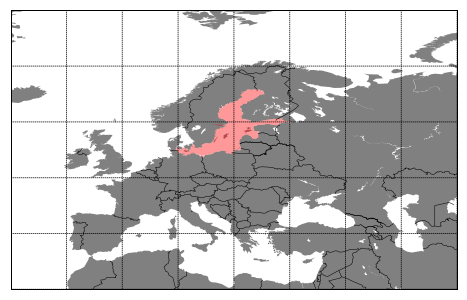

In [13]:
limN, limS, limW, limE = 80,30,-20,60

dlat = 10
dlon = 10


ax = plt.figure(figsize=(8,10), facecolor = 'w')
mymap = Basemap(projection='cyl', llcrnrlon=limW, \
      urcrnrlon=limE, llcrnrlat=limS, urcrnrlat=limN, resolution='l')
mymap.drawcountries()
#mymap.drawcoastlines()
mymap.fillcontinents(color='grey',lake_color='white')
mymap.drawparallels(np.arange(-90.,120.,dlon))
mymap.drawmeridians(np.arange(0.,360.,dlat))
mymap.drawmapboundary(fill_color='white')

draw_screen_poly(y, x, m )
# it has some weird little dark red bits, but it looks much better

In [18]:
matplotlib.rcParams.update({'font.size': 16})

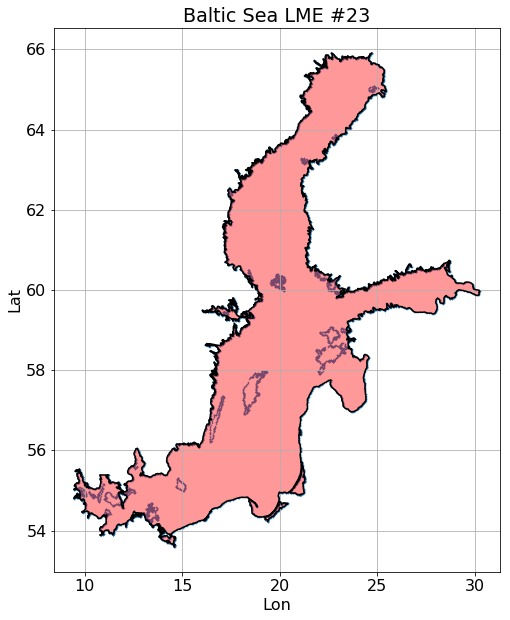

In [19]:
index = 0 
ft = lyr.GetFeature(index)
#print "LME ", ft.items()['LME_NUMBER'], '  ',  ft.items()['LME_NAME']

geom = ft.GetGeometryRef()
 
"""Create lists to store values for polygons"""
codes = []; all_x = []; all_y = []; all_XY= []

# loop over all the things in the feature:
for i in range(geom.GetGeometryCount()):
    
    r = geom.GetGeometryRef(i)
    x = [r.GetX(j) for j in range(r.GetPointCount())]
    y = [r.GetY(j) for j in range(r.GetPointCount())]

    # this is some sort of polygon thing:
    codes += [mpath.Path.MOVETO] + (len(x)-1)*[mpath.Path.LINETO]

    all_x += x
    all_y += y
    
        
i = 0
    
r = geom.GetGeometryRef(i)
x = [r.GetX(j) for j in range(r.GetPointCount())]
y = [r.GetY(j) for j in range(r.GetPointCount())]




fig = plt.figure(figsize=(8,10), facecolor = 'w')
ax = fig.add_subplot(111)

plt.scatter(all_x,all_y, marker = '.', s = 1)
plt.plot(x,y,c = 'k')
plt.grid()
plt.xlabel('Lon')
plt.ylabel('Lat')
title = ft.items()['LME_NAME'] + ' LME #'+ str(int(ft.items()['LME_NUMBER']))
plt.title(title)
plt.axis('equal')
plt.axis('tight')

xy = zip(x,y)
poly = Polygon(xy, facecolor='red', alpha=0.4 )
plt.gca().add_patch(poly)

polygons = 7


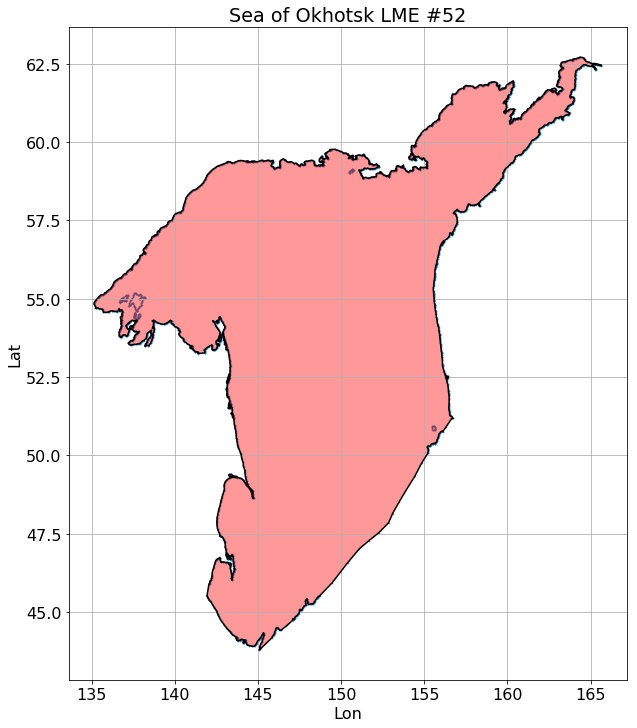

In [20]:
index = 1 
ft = lyr.GetFeature(index)
#print "LME ", ft.items()['LME_NUMBER'], '  ',  ft.items()['LME_NAME']

geom = ft.GetGeometryRef()
 
"""Create lists to store values for polygons"""
codes = []; all_x = []; all_y = []; all_XY= []

# loop over all the things in the feature:
for i in range(geom.GetGeometryCount()):
    
    r = geom.GetGeometryRef(i)
    x = [r.GetX(j) for j in range(r.GetPointCount())]
    y = [r.GetY(j) for j in range(r.GetPointCount())]

    # this is some sort of polygon thing:
    codes += [mpath.Path.MOVETO] + (len(x)-1)*[mpath.Path.LINETO]

    all_x += x
    all_y += y
    
        
i = 0
    
r = geom.GetGeometryRef(i)
x = [r.GetX(j) for j in range(r.GetPointCount())]
y = [r.GetY(j) for j in range(r.GetPointCount())]



fig = plt.figure(figsize=(10,12), facecolor = 'w')
ax = fig.add_subplot(111)

plt.scatter(all_x,all_y, marker = '.', s = 1)
plt.plot(x,y,c = 'k')
plt.grid()
plt.xlabel('Lon')
plt.ylabel('Lat')
title = ft.items()['LME_NAME'] + ' LME #'+ str(int(ft.items()['LME_NUMBER']))
plt.title(title)
plt.axis('equal')
plt.axis('tight')

print 'polygons = ' + str(geom.GetGeometryCount())


xy = zip(x,y)
poly = Polygon(xy, facecolor='red', alpha=0.4 )
plt.gca().add_patch(poly)

In [24]:
geom.GetGeometryType()

6

In [29]:
r?

Index 4 is a multipolygon and not a polygon (type 6)

In [30]:
range(geom.GetGeometryCount())

[0, 1]

polygons = 2


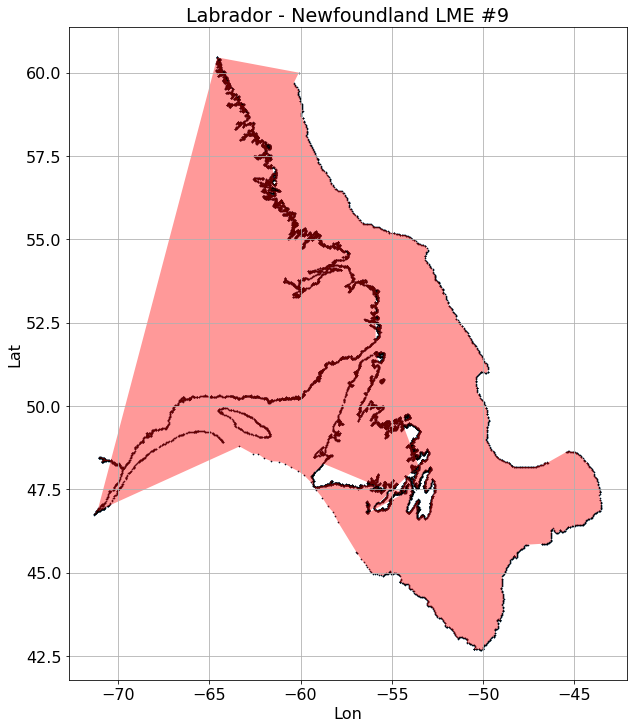

In [36]:
index = 4 
ft = lyr.GetFeature(index)
#print "LME ", ft.items()['LME_NUMBER'], '  ',  ft.items()['LME_NAME']

geom = ft.GetGeometryRef()
 
"""Create lists to store values for polygons"""
codes = []; all_x = []; all_y = []; all_XY= []
less_x = []; less_y = []

"""Check if multipolygon:"""
if (geom.GetGeometryType() == ogr.wkbMultiPolygon):
    #print "Geometric features", geom.GetGeometryCount()
    for i in range(geom.GetGeometryCount()):

        r = geom.GetGeometryRef(i)
        for part in r:
            x = [part.GetX(j) for j in range(part.GetPointCount())]
            y = [part.GetY(j) for j in range(part.GetPointCount())]

            codes += [mpath.Path.MOVETO] + (len(x)-1)*[mpath.Path.LINETO]
            all_x += x
            all_y += y
            # is this missing an all_XY assignment?
    # index 1 is just a couple of points, so ignore this
    i = 0
    r = geom.GetGeometryRef(i)
    for part in r:
        x = [part.GetX(j) for j in range(part.GetPointCount())]
        y = [part.GetY(j) for j in range(part.GetPointCount())]
        
        less_x += x
        less_y += y


fig = plt.figure(figsize=(10,12), facecolor = 'w')
ax = fig.add_subplot(111)

plt.scatter(all_x,all_y, marker = '.', s = 1)
plt.scatter(less_x,less_y,c = 'k', marker = '.', s = 1)
plt.grid()
plt.xlabel('Lon')
plt.ylabel('Lat')
title = ft.items()['LME_NAME'] + ' LME #'+ str(int(ft.items()['LME_NUMBER']))
plt.title(title)
plt.axis('equal')
plt.axis('tight')

print 'polygons = ' + str(geom.GetGeometryCount())

# this part is not working:
xy = zip(less_x,less_y)
poly = Polygon(xy, facecolor='red', alpha=0.4 )
plt.gca().add_patch(poly)

So, there is a big island in it. How do I make this into a polygon?
Just use as it and apply SSt mask on top later

In [42]:
range(geom.GetGeometryCount())

[0, 1, 2, 3]

Text(0.5,1,u'Barents Sea LME #20')

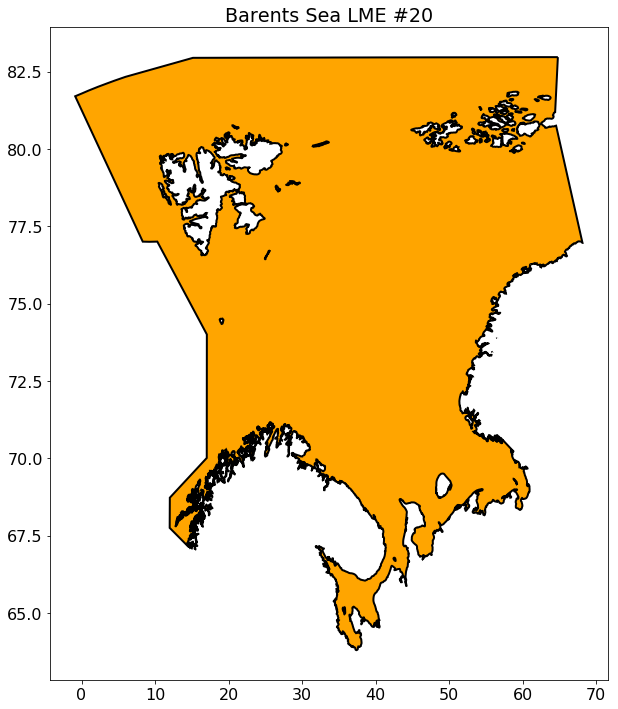

In [71]:
index = 53 
ft = lyr.GetFeature(index)
#print "LME ", ft.items()['LME_NUMBER'], '  ',  ft.items()['LME_NAME']

geom = ft.GetGeometryRef()
 
"""Create lists to store values for polygons"""
codes = []; all_x = []; all_y = []; all_XY= []
less_x = []; less_y = []

if (geom.GetGeometryType() == ogr.wkbMultiPolygon):
  codes = []
  for i in range(geom.GetGeometryCount()):
    # Read ring geometry and create path
    r = geom.GetGeometryRef(i)
    for part in r:
      x = [part.GetX(j) for j in range(part.GetPointCount())]
      y = [part.GetY(j) for j in range(part.GetPointCount())]
      # skip boundary between individual rings
      codes += [mpath.Path.MOVETO] + (len(x)-1)*[mpath.Path.LINETO]
      all_x += x
      all_y += y

lme_path = mpath.Path(np.column_stack((all_x,all_y)), codes) 
lme_patch = patches.PathPatch(lme_path, facecolor='orange', lw=2)

fig = plt.figure(figsize=(10,12), facecolor = 'w')
ax = fig.add_subplot(111)

ax.add_patch(lme_patch)
ax.autoscale_view()
title = ft.items()['LME_NAME'] + ' LME #'+ str(int(ft.items()['LME_NUMBER']))
plt.title(title)

How to turn this patch object into a polygon?

In [72]:
mypoly = mpath.Path.to_polygons(lme_path)

In [ ]:

plt.scatter(all_x,all_y, marker = '.', s = 1)
plt.scatter(less_x,less_y,c = 'k', marker = '.', s = 1)
plt.grid()
plt.xlabel('Lon')
plt.ylabel('Lat')
title = ft.items()['LME_NAME'] + ' LME #'+ str(int(ft.items()['LME_NUMBER']))
plt.title(title)
plt.axis('equal')
plt.axis('tight')

print 'polygons = ' + str(geom.GetGeometryCount())


xy = zip(less_x,less_y)
poly = Polygon(xy, facecolor='red', alpha=0.4 )
plt.gca().add_patch(mypoly)

In [56]:
if (geom.GetGeometryType() == ogr.wkbMultiPolygon):
    codes = []
    for i in range(geom.GetGeometryCount()):
        # Read ring geometry and create path
        r = geom.GetGeometryRef(i)
        for part in r:
            x = [part.GetX(j) for j in range(part.GetPointCount())]
            y = [part.GetY(j) for j in range(part.GetPointCount())]
            # skip boundary between individual rings
            codes += [mpath.Path.MOVETO] + (len(x)-1)*[mpath.Path.LINETO]
            all_x += x
            all_y += y

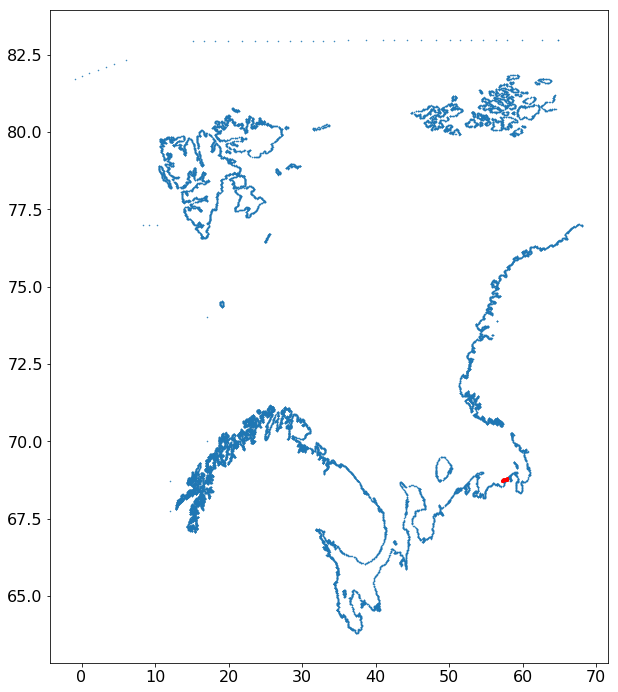

In [60]:
fig = plt.figure(figsize=(10,12), facecolor = 'w')
ax = fig.add_subplot(111)

plt.scatter(all_x,all_y, marker = '.', s = 1)
plt.scatter(x,y,c = 'r', marker = '.', s = 10)

polygons = 4


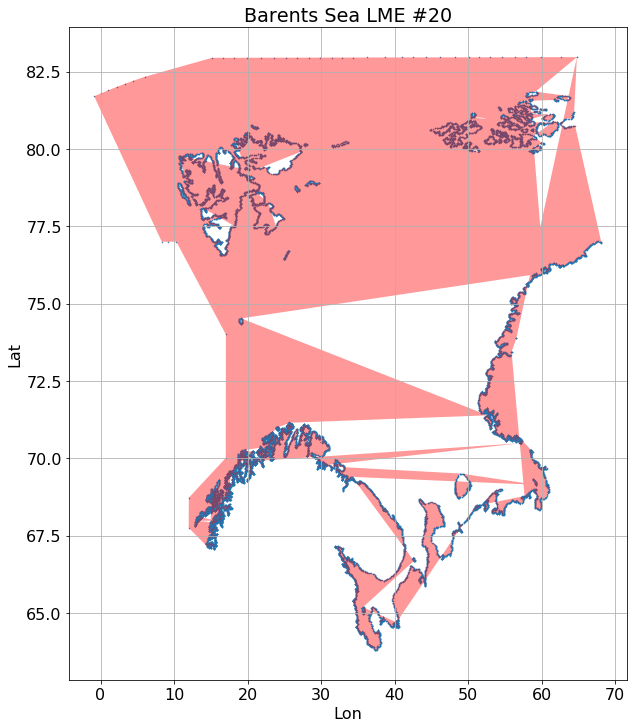

In [58]:
fig = plt.figure(figsize=(10,12), facecolor = 'w')
ax = fig.add_subplot(111)

plt.scatter(all_x,all_y, marker = '.', s = 1)
#plt.scatter(less_x,less_y,c = 'k', marker = '.', s = 1)
plt.grid()
plt.xlabel('Lon')
plt.ylabel('Lat')
title = ft.items()['LME_NAME'] + ' LME #'+ str(int(ft.items()['LME_NUMBER']))
plt.title(title)
plt.axis('equal')
plt.axis('tight')

print 'polygons = ' + str(geom.GetGeometryCount())

xy = zip(all_x,all_y)
poly = Polygon(xy, facecolor='red', alpha=0.4 )
plt.gca().add_patch(poly)